Circuit simulation of the Open Haloscope hardware

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# lcapy
from lcapy import Circuit, j, omega, s

In [7]:
cct = Circuit( """
                Vi 1 0_1 step; down
                R 1 2; right=1.5
                Cx 2 3; down=1
                C 3 0; down=1
                W 3 3_1; right=0.5
                L 3_1 0_3; down=1
                W 0_3 0; left=0.5
                W 0_1 0; right
                W 0 0_2; right=1
                P1 2_2 0_2; down
                W 2 2_2;right=1
                """ )

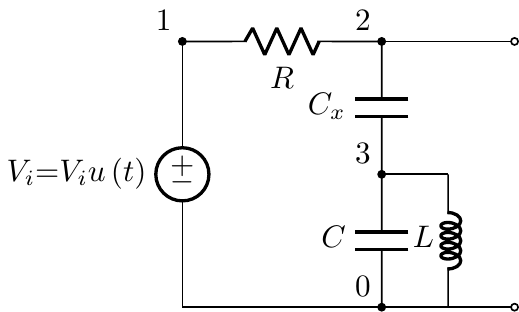

In [8]:
cct.draw(cpt_size=1, node_spacing=1.5, scale=0.75)

In [9]:
H = (cct.C.V(s) / cct.Vi.V(s)).simplify()

In [10]:
C = 1e-8
R = 50
L = 1e-4
Cx = 1e-9


H1 = H.subs('C',C).subs('R',R).subs('Cx',Cx).subs('L',L)
H1(j * omega)
H

                      2                 
                Cₓ⋅L⋅s                  
────────────────────────────────────────
          3               2             
C⋅Cₓ⋅L⋅R⋅s  + Cₓ⋅R⋅s + L⋅s ⋅(C + Cₓ) + 1

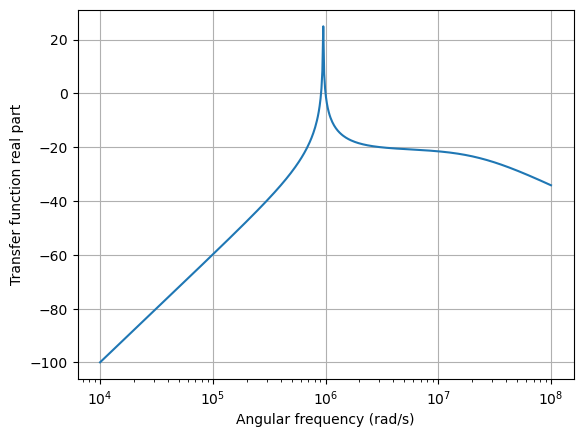

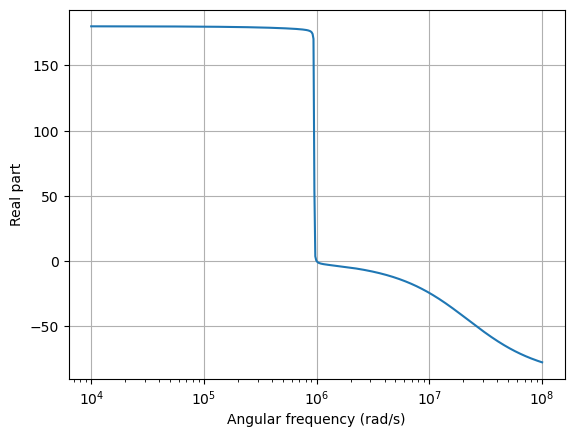

In [11]:
w = np.logspace(4, 8, 500)

ax = H1(j * omega).dB.plot(w, log_frequency=True)
ax = H1(j * omega).phase_degrees.plot(w, log_frequency=True)